## PSPNet

In [ ]:
from segnet.utils import infer_dir, infer_img
import matplotlib.pyplot as plt

In [ ]:
from segnet.keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12

model_ade20k = pspnet_50_ADE_20K() # load the pretrained model trained on ADE20k dataset

model_city_scape = pspnet_101_cityscapes() # load the pretrained model trained on Cityscapes dataset

model_pascal_voc = pspnet_101_voc12() # load the pretrained model trained on Pascal VOC 2012 dataset

# load any of the 3 pretrained models


In [ ]:
models = [model_ade20k, model_city_scape, model_pascal_voc] 

img_path = "datasets/imagesTest/test10.jpg"

outs = []
for model in models:
    out = model.predict_segmentation(
        inp= img_path, 
        # out_fname= "out.jpg",
        )
    outs.append(out)

fig, ax = plt.subplots(1,3, figsize = (15,15))
for i in range(3):
    ax[i].imshow(outs[i])

In [1]:
from segnet.keras_segmentation.models.pspnet import pspnet_50, resnet50_pspnet
from segnet.keras_segmentation.models.model_utils import transfer_weights

pretrained_model = pspnet_50 (n_classes = 51)
pretrained_model.load_weights('segnet/pretrained/dataset1/pspnet/five_last_layers/')

model_dataset1 = pspnet_50 (n_classes = 2)
transfer_weights(pretrained_model, model_dataset1)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-15 16:20:33.905559: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-15 16:20:33.906718: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Copying weights 


225it [00:01, 154.25it/s]

Copied weights of 120 layers and skipped 1 layers


In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = "datasets/imagesTest/test10.jpg"

inp_images_pred = model_dataset1.predict_segmentation(
    inp= img_path,
    #out_fname="/tmp/out.png",
)

plt.imshow(cv2.imread(img_path))
plt.show()
plt.imshow(inp_images_pred)
plt.show()

In [ ]:
dir_path = 'datasets/dataset1/images_prepped_test/'
infer_dir(model_dataset1, dir_path, 2)

In [27]:
# for layer in model.layers[:-5]:
#     layer.trainable = False 

# model.train(
#     train_images =  "datasets/dataset1/images_prepped_train/",
#     train_annotations = "datasets/dataset1/annotations_prepped_train/",
#     checkpoints_path = "segnet/tmp/vgg_unet_1" , epochs=5
# )

# model.save_weights("segnet/pretrained/dataset1/pspnet/all_retrained/")

# model.save_weights("segnet/pretrained/dataset1/pspnet/five_last_layers/")

In [10]:
# eval_seg_dataset1 = model.evaluate_segmentation(
#     inp_images_dir = 'datasets/dataset1/images_prepped_test/',
#     annotations_dir = 'datasets/dataset1/annotations_prepped_test/',
#     )

# print(eval_seg_dataset1)

In [12]:
# import os

# annot_list = os.listdir(path = 'datasets/dataset1/annotations_prepped_test/')[:10]
# n_classes = 51

# test_list = []
# for i in range(len(annot_list)):
#     for j in range(i+1, len(annot_list)):
#         image_1 = cv2.imread(annot_list[i])
#         image_2 = cv2.imread(annot_list[j])
#         test = evaluate(inp_images_pred, annotations, n_classes)
#         test_list.append(test["class_wise_IU"])

# print(test_list)

## RandomWalk on "dataset1"

In [14]:
import random_walk.get_markers as gm
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random_walk.utils as uti

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

pygame 2.1.2 (SDL 2.0.18, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [15]:
# nombre_labels = 2
# size_of_markers = 10

# markers, image = gm.create_label("datasets/imagesTest/franceTrouee.jpg", nombre_labels, size_of_markers)

Vous pouvez labeliser l'image. 
 Pour chaque label cliquez sur les points présents dans le label puis appuyez sur 'espace' pour passer au label suivant
Labelisation de la section numero 1
[195 138]
[215 221]
[286 248]
[116 329]
[164 143]
[110 139]
[326 120]
[413 384]
[412 397]
[420 389]
Labelisation de la section numero 2
[403 222]
[402 286]
[355 360]
[292 394]
[ 38 396]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


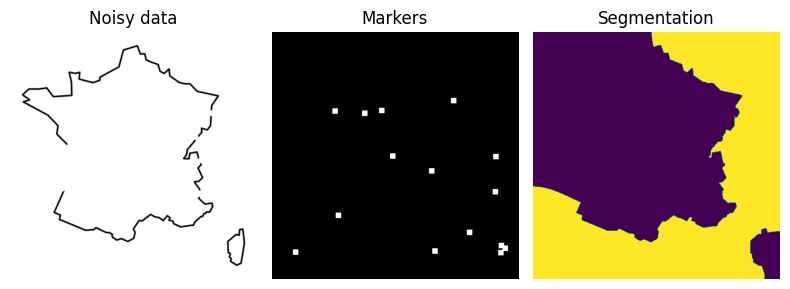

In [16]:
# labels = random_walker(np.mean(image, axis=2), np.mean(markers, axis=2), beta=1, mode='bf')
# uti.show_results_random_malk(image,markers,labels)

In [17]:
from random_walk.evaluate import evaluate

# inp_images_pred = labels
# annotations = 
# n_classes = 2

# eval_randomwalk_dataset1 = evaluate(inp_images_pred, annotations, n_classes)

### Impact du bruit sur RandomWalk

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


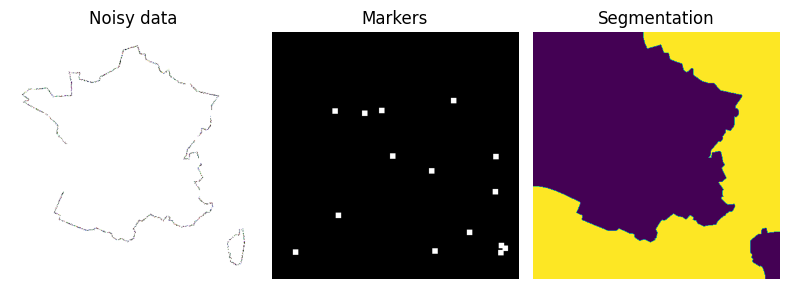

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


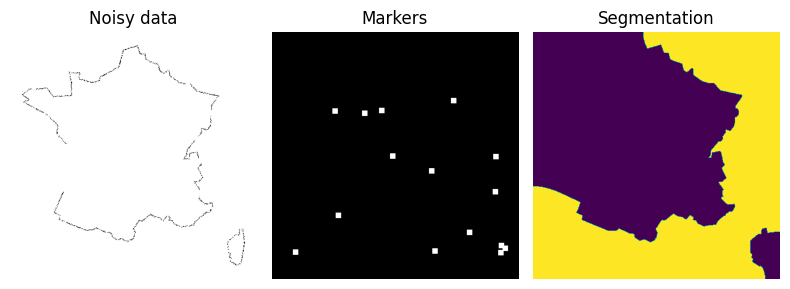

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


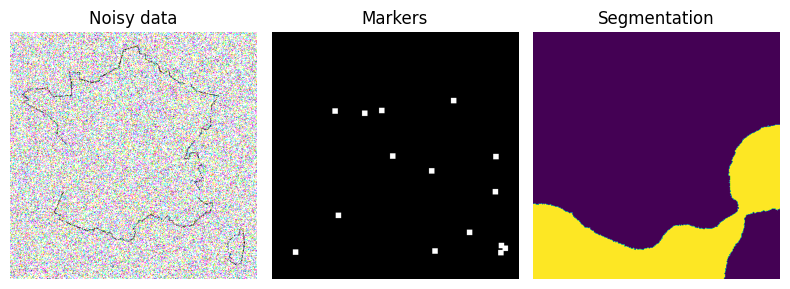

KeyboardInterrupt: 

In [18]:
# modifications = ['gauss','poisson','speckle','s&p' ]
# image_modifie = []
# for i in range(len(modifications)):
#     image_modifie.append(uti.noisy(modifications[i], image))
    
# labels_modifiee = []
# for i in range(len(modifications)):
#     labels_modifiee.append(random_walker(np.mean(image_modifie[i], axis=2), np.mean(markers, axis=2), beta=10, mode='bf'))
#     uti.show_results_random_malk(image_modifie[i],markers,labels_modifiee[i])

1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


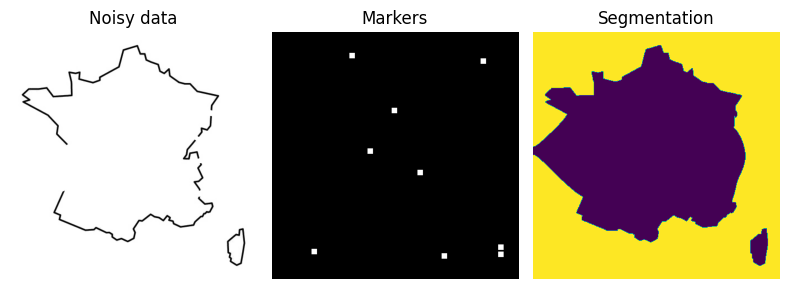

6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


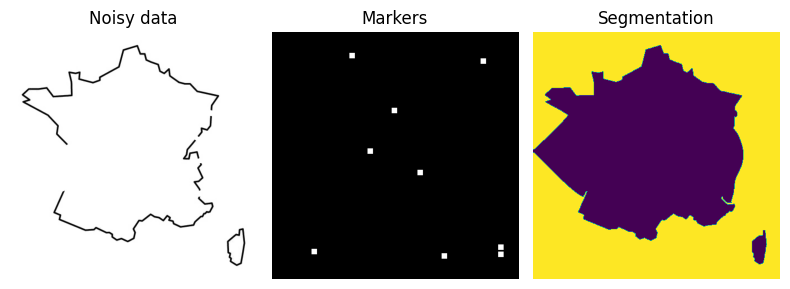

11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


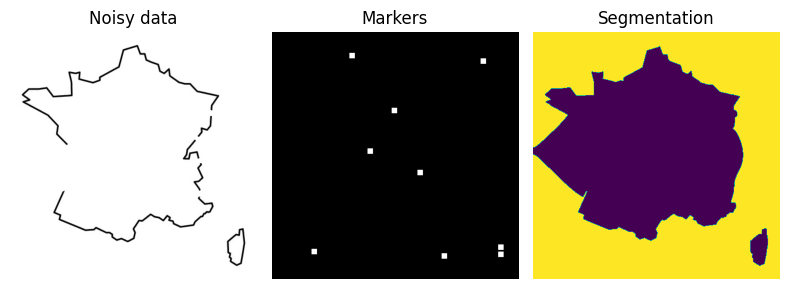

16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


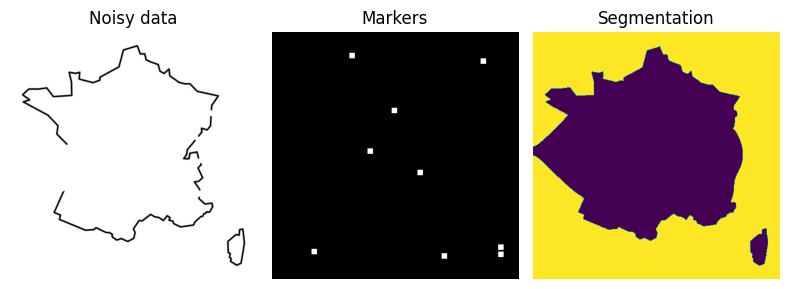

21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


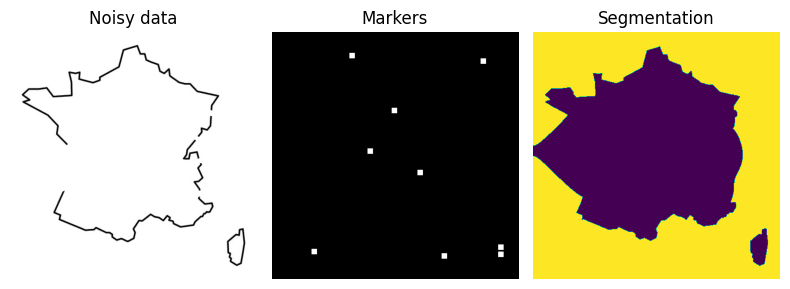

26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


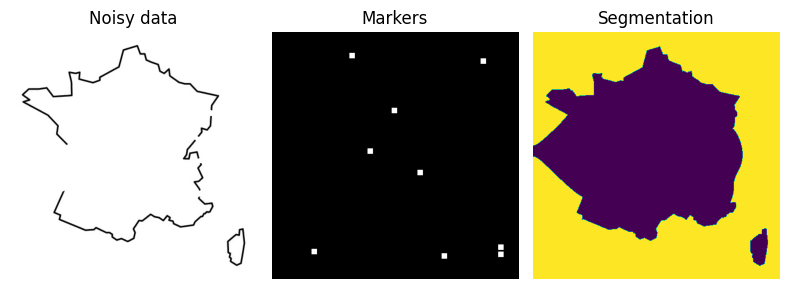

31


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


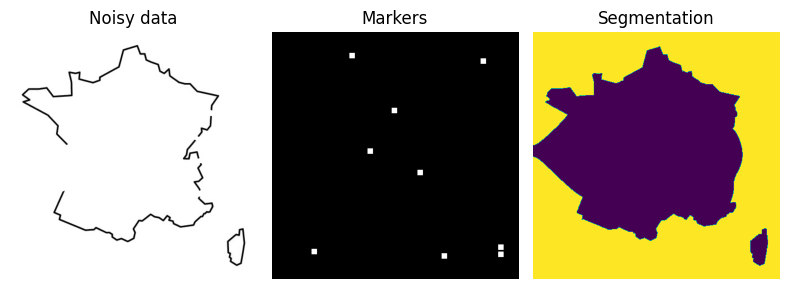

36


KeyboardInterrupt: 

: 

In [ ]:
# beta_values = range(1, 75,5)
# labels_beta = []
# for i in range(len(beta_values)):
#     print(beta_values[i])
#     labels_beta.append(random_walker(np.mean(image, axis=2), np.mean(markers, axis=2), beta=beta_values[i], mode='bf'))
#     uti.show_results_random_malk(image,markers,labels_beta[i])